### train

In [67]:
from stable_baselines3.common.env_checker import check_env
from geneEnv import geneEnv

env = geneEnv(2,32,80)
# It will check your custom environment and output additional warnings if needed
check_env(env)

IndexError: list index out of range

In [49]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.monitor import Monitor
from geneEnv import geneEnv



env = geneEnv(2,32,80)
env = Monitor(env, filename='result/TwoDise/monitor.csv')

# print(f"Observation space: {env.observation_space}")
# print(f"Action space: {env.action_space}")
# print(f"Sample observation: {env.reset()}")

model = PPO("MlpPolicy", env, verbose=1,n_epochs=20)
model.learn(total_timesteps=100_0)
model.save("result/TwoDise/trained_model")

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -4.13    |
| time/              |          |
|    fps             | 85       |
|    iterations      | 1        |
|    time_elapsed    | 23       |
|    total_timesteps | 2048     |
---------------------------------


### evaluate

In [45]:
from stable_baselines3 import PPO
from geneEnv import geneEnv

model = PPO.load('trained_model.zip')

print("Evaluating")
#env = model.get_env()
env = geneEnv(1,50,100)
model.set_env(env)


#check_env(env)


obs, _ = env.reset()

reward_list = []
for i in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, info = env.step(action)
    reward_list.append(reward)

print(sum(reward_list)/len(reward_list))

Evaluating
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-4.657391766733887


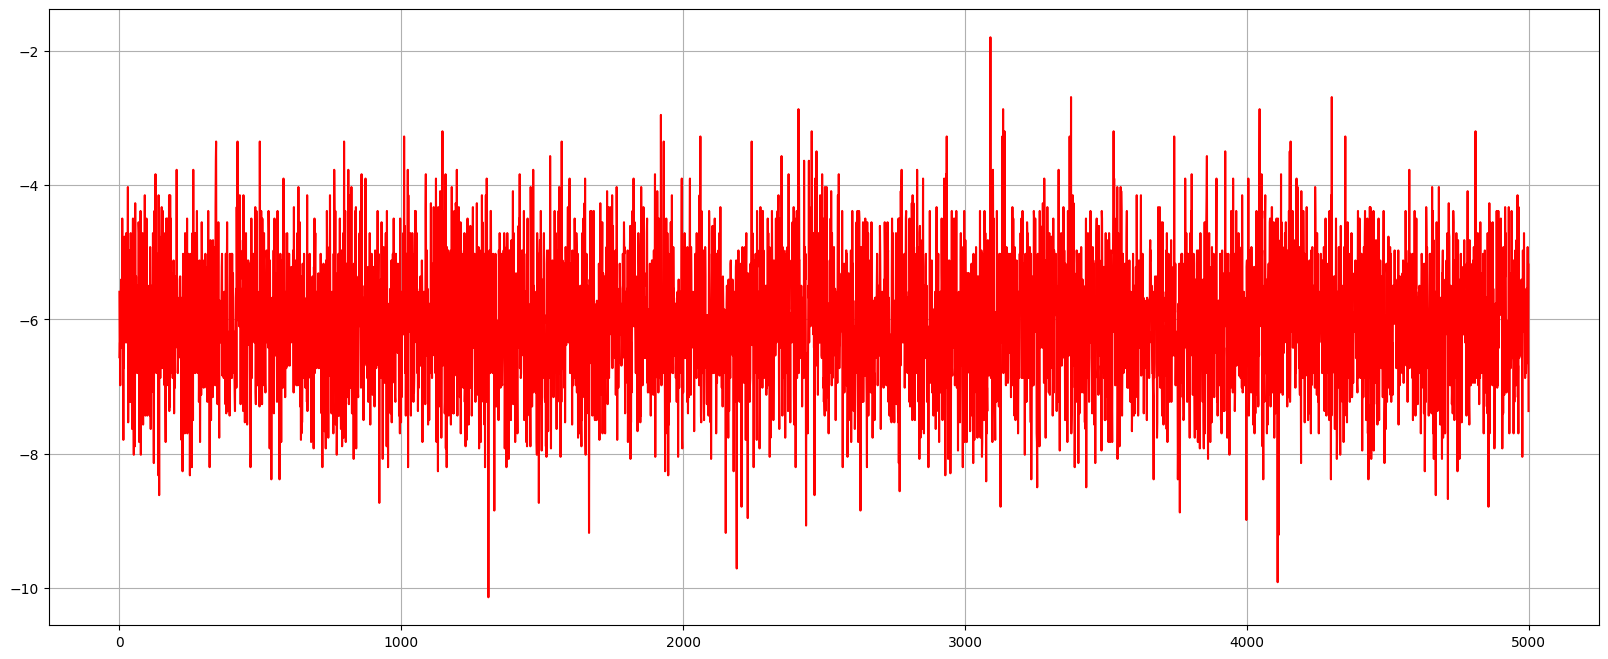

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(reward_list,'r')
plt.grid(True)
plt.show()